<a href="https://colab.research.google.com/github/alissaleigh/food-sales-predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing and Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
filename = '/content/drive/MyDrive/panda/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

Total rows and columns:

In [4]:
#I did both options to see how they look, in the future I'll probably just use the len options since it's less key
print(df[df.columns[0]].count())
print(len(df.index))

8523
8523


Datatypes of each variable:

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Duplicates:

In [6]:
df.duplicated().sum()

0

In [7]:
#While there are no duplicates, I included the text for removing to make sure that I understood how to impute it
df = df.drop_duplicates()
df.duplicated().sum()

0

Identifing Missing Values:

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Added this in so that I can I can see the % of the empty data there is to better gage how to deal with the missing data
df.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
#As we're missing more then 5% of the data I'm going to still continue with deleteing it
df.dropna(inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Fixing Inconsistancies:

In [11]:
#Working through anything that aren't a number data base and could have mutple of the same answer
#I'm working with the assumption that everything has been hand imputted as the raw data does not appear to have any dropdowns I can see
df['Item_Type'].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [12]:
df['Outlet_Size'].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df['Outlet_Type'].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [14]:
df['Outlet_Location_Type'].value_counts()

Tier 1    1860
Tier 3    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [16]:
#Combinded the corrections for the inconsistancies for Item Fat Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [17]:
#I checked the year more to verify that there hasn't been any misstypes like 2090 when they met 2009
df['Outlet_Establishment_Year'].value_counts()

1987    932
1999    930
1997    930
2004    930
2009    928
Name: Outlet_Establishment_Year, dtype: int64

Statistical Summary:




In [18]:
df.describe() 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


##Statistical Analyses

Updated for Part 3 of Project 1

In [19]:
#Importing the bellow to add in these other libaries to this data set
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Histogram to view the distributions of a few features in the dataset:

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

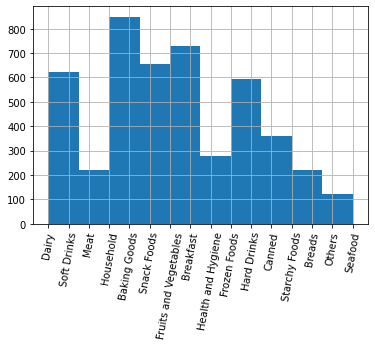

In [20]:
#Item Types vs the quanty of that listing in the sheet.
df['Item_Type'].hist()
plt.xticks(rotation = 80)

<AxesSubplot:>

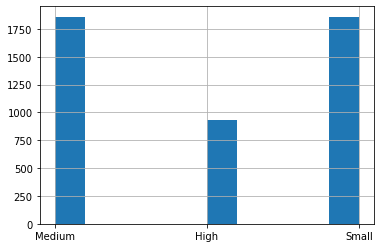

In [21]:
#The size of the outlet comapred to the total number of preduced cells
df['Outlet_Size'].hist()

Boxplot to view statistical summaries of a few features in the dataset

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

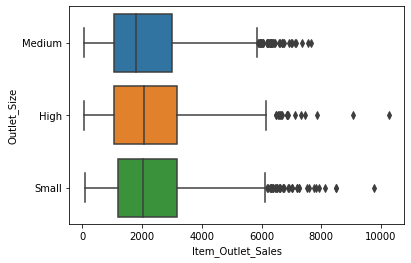

In [22]:
#Comparason of outlet size to the item sales in the outlets
sns.boxplot(x= 'Item_Outlet_Sales', y = 'Outlet_Size', data=df)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

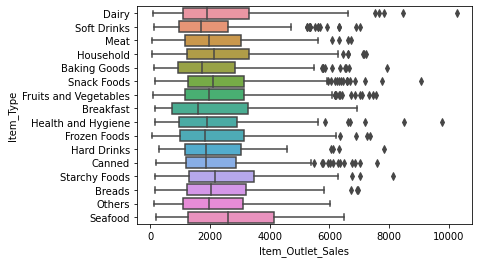

In [23]:
#Comparason of the types to the outlet sales
sns.boxplot(x= 'Item_Outlet_Sales', y = 'Item_Type', data=df)

Heatmap of the correlation between features

<AxesSubplot:>

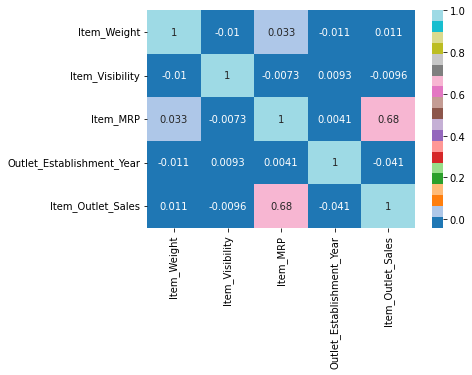

In [24]:
corr = df.corr()
sns.heatmap(corr, cmap = 'tab20', annot = True)

Found the various color sets on 'https://matplotlib.org/stable/tutorials/colors/colormaps.html' as I wanted to know what other options where there with a color guide. I personaly went with the more eyecatching option that also varried a bit more then one color

##Data Visualizations

Both of my visualizations are ment to show sales and a few factors that could be on intrest with regards to sales

In [25]:
yearsSales = df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].nunique()
yearsSales

Outlet_Establishment_Year
1987    788
1997    778
1999    785
2004    806
2009    779
Name: Item_Outlet_Sales, dtype: int64

In [26]:
uniqueYears = np.array(yearsSales.index)
uniqueYears

array([1987, 1997, 1999, 2004, 2009])

In [27]:
numSales = np.array(yearsSales.values)
numSales

array([788, 778, 785, 806, 779])

Text(0.5, 1.0, 'Sales Based On Outlet Opening Year')

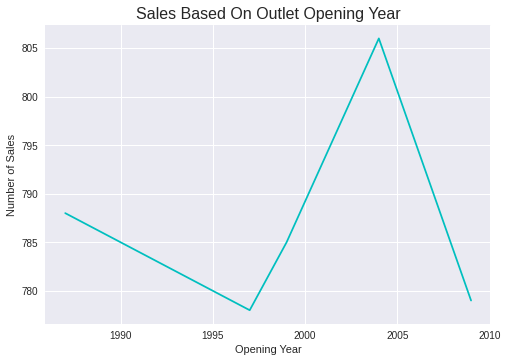

In [28]:
plt.style.use('seaborn')
plt.plot(uniqueYears, numSales, c = 'c')
plt.xlabel('Opening Year')
plt.ylabel('Number of Sales')
plt.title('Sales Based On Outlet Opening Year', fontsize = 16)

Text(0.5, 1.0, 'Sales Per Item')

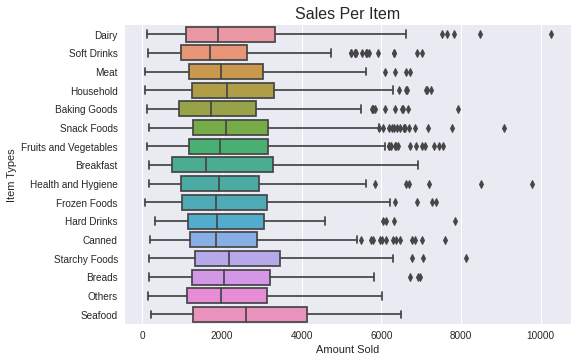

In [29]:
sns.boxplot(x='Item_Outlet_Sales', y='Item_Type', data=df)
plt.xlabel('Amount Sold')
plt.ylabel('Item Types')
plt.title('Sales Per Item', fontsize = 16)